In [20]:
# imamo grid... sestkotnik je 4 enote sirok in 2 enoti visok

A1 = vector([0, - 2])
A2 = vector([3, - 1])

############## Razredi #############

class U:
    def __init__(self, a, b):
        self.a = a # a konstanta ... koliko A1 vektorjev uporabimo
        self.b = b
        
    def __repr__(self):
        a,b = self.podatki()
        return ('{}({}a, {}b)'.format(self.__class__.__name__, a, b))
    
    def __eq__(self, other):
        return (self.a == other.a and 
               self.b == other.b and
               self.__class__.__name__ == other.__class__.__name__)
    
    def __hash__(self): 
#         return hash((self.a, self.b))
        return hash(exp(self.a + exp(self.b)))
    
    def podatki(self):
        return self.a, self.b
    
    def koordinate(self):
        vektor = self.a * A1 + self.b * A2
        x = vektor[0]
        y = vektor[1]
        return [x, y]
    
    def sosedi(self):
        s = set({V(self.a, self.b), V(self.a, self.b - 1), V(self.a + 1, self.b - 1)})
        return s
    
    def premakni(self, c, d):
        return U(self.a + c, self.b + d)
    
class V:
    def __init__(self, a, b):
        self.a = a # a konstanta ... koliko A1 vektorjev uporabimo
        self.b = b
        
    def __repr__(self):
        a,b = self.podatki()
        return ('{}({}a, {}b)'.format(self.__class__.__name__, a, b))
    
    def __eq__(self, other):
        return (self.a == other.a and 
               self.b == other.b and
               self.__class__.__name__ == other.__class__.__name__)
    
    def __hash__(self): 
#         return hash((self.a, self.b))
        return hash(exp(self.a + exp(self.b)))
    
    def podatki(self):
        return self.a, self.b
    
    def koordinate(self):
        vektor = self.a * A1 + self.b * A2 + vector([2, 0])
        x = vektor[0]
        y = vektor[1]
        return [x, y]
    
    def sosedi(self):
        s = set({U(self.a, self.b), U(self.a - 1, self.b + 1), U(self.a, self.b + 1)})
        return s
        
    def premakni(self, c, d):
        return V(self.a + c, self.b + d)

############## Funkcije #############

def grid(k, l, m, n):
    # oglisca = ([0, 0], [k, l], [m, n], [k + m, l + n])
    # print U(0,0).koordinate(), U(k, l).koordinate(), U(m, n).koordinate(), U(k + m, l + n).koordinate()

    mina = min(0, k, m, k + m)
    maxa = max(0, k, m, k + m)
    minb = min(0, l, n, l + n)
    maxb = max(0, l, n, l + n)

    mnozica = set()
    for i in range(mina, maxa + 1):
        for j in range(minb, maxb + 1):
            mnozica.add(U(i, j))
    
    return mnozica

# lahko bi poskusili dodati le tiste, ki so "blizje" paralelogramu, ne celege pravokotnika
# def grid1(k, l, m, n):
#     mina = min(0, k, m, k + m)
#     maxa = max(0, k, m, k + m)
#     minb = min(0, l, n, l + n)
#     maxb = max(0, l, n, l + n)

#     mnozica = set()
#     for i in range(mina, maxa + 1):
#         for j in range(minb, maxb + 1):
#             mnozica.add(U(i, j))
    
#     return mnozica

# 3x3 matrika
def determinanta(matrika): 
    a11 = matrika[0][0]
    a12 = matrika[0][1]
    a13 = matrika[0][2]
    
    a21 = matrika[1][0]
    a22 = matrika[1][1]
    a23 = matrika[1][2]
    
    a31 = matrika[2][0]
    a32 = matrika[2][1]
    a33 = matrika[2][2]
        
    det = (
          a11 * (a22 * a33 - a32 * a23) - 
          a12 * (a21 * a33 - a31 * a23) + 
          a13 * (a21 * a32 - a31 * a22)
          )
            
    return det

# gledamo kje je tocka w glede na vektor uv
# ce je tocka levo, je predznak determinante pozitiven,
# ce desno, je predznak negativen,
# ce pa so kolinearne je determinanta 0.
# sprejme tocke U ali V
def zavoj(u, v , w):
    u_x, u_y = u.koordinate()
    v_x, v_y = v.koordinate()
    w_x, w_y = w.koordinate()
    
    matrika = matrix([[1, 1, 1], [u_x, v_x, w_x], [u_y, v_y, w_y]])
    
    return sgn(determinanta(matrika))

def v_paralelogramu(G, u0, u1, u2, u3):
    # G mnozica Ujev, ki jih bomo pregledali,
    # ui zaporedna oglisca v paralelogramu, tako da je notranjost na levi,
    # u0 pa je izhodisce 
    # dopuscamo tocke na daljici u0u1 in na daljici  u3u0
    
    Uji = set()
    Vji = set()
    
    for u in G:   
        v = V(u.a, u.b) # "pripadajoce" vozlisce V

        pogoj_u = (zavoj(u0, u1, u) >= 0 and
                   zavoj(u1, u2, u) >  0 and
                   zavoj(u2, u3, u) >  0 and
                   zavoj(u3, u0, u) >= 0)
        
        pogoj_v = (zavoj(u0, u1, v) >= 0 and
                   zavoj(u1, u2, v) >  0 and
                   zavoj(u2, u3, v) >  0 and
                   zavoj(u3, u0, v) >= 0)
        if pogoj_u:
            Uji.add(u)
        if pogoj_v:
            Vji.add(v)
    
    return Uji, Vji
    
def vozlisca_na_torusu(k, l, m, n):
    G = grid(k, l, m, n)
    
    u_00 = U(0,0)
    u_kl = U(k, l)
    u_klmn = U(k + m, l + n)
    u_mn = U(m, n)

    # ugotovimo orientacijo
    if zavoj(u_kl, u_mn, u_00) == 0:
        Uji, Vji = "Izrojen", "Izrojen" # niso mnozice
    elif zavoj(u_kl, u_mn, u_00) > 0:
        # u_00 lezi levo od vektorja u_kl u_mn
        Uji, Vji = v_paralelogramu(G, u_00, u_kl, u_klmn, u_mn)
    elif zavoj(u_kl, u_mn, u_00) < 0:
        # u_00 lezi desno od vektorja u_kl u_mn
        Uji, Vji = v_paralelogramu(G, u_00, u_mn, u_klmn, u_kl)
    
    return Uji, Vji

def povezave_na_torusu(k, l, m, n):
    Uij, Vij = vozlisca_na_torusu(k, l, m, n)
    if Uij == "Izrojen":
        return Uij # paralelogram je izrojen
    else:
        vozlisca = union(Uij, Vij) # vozlisca znotraj paralelograma (brez stranic)
        pregledane = set()
        povezave = []
        for tocka in vozlisca:
            for sosed in (tocka.sosedi() - pregledane): # tocka.sosedi().difference(pregledane)
                sosed_kl = sosed.premakni(k, l)
                sosed_mn = sosed.premakni(m, n)
                if sosed in vozlisca:
                    povezave.append((tocka, sosed))
                else:
                    if sosed_kl in vozlisca:
                        povezave.append((tocka, sosed_kl))
                    elif sosed_mn in vozlisca:
                        povezave.append((tocka, sosed_mn))
                    elif sosed == U(k + m, l + n):
                        povezave.append((tocka, U(0, 0))) # to je sosed_klmn, nasprotno oglisce
            pregledane.add(tocka)
        return povezave 

def nanotorus(k, l, m, n):
    p = povezave_na_torusu(k, l, m, n)
    if p == "Izrojen":
        print("Paralelogram je izrojen!")
    else:
        G = Graph(p, multiedges = True)
        G._pos = {v: v.koordinate() for v in G}
        return G

#def pvs(G):
#    s = []
#    s.append(G.vertices()[0])
#    d = {}
#    oce = {}
#    for v in G.vertices():
#        d[v] = "Inf"
#        oce[v] = "None"
#    d[G.vertices()[0]] = 0
#    while len(s) > 0:
#        w = s[0]
#        del(s[0])
#        for j in w.sosedi(): #ne dela, ker ti sosedje niso isto kot sosedi na grafu
#            if d[j] == "Inf":
#                d[j] = d[w] + 1
#                oce[j] = w
#                s.append(j)
#    return d, oce

In [4]:
def vozlisca_na_razdalji_d(graf, start, dodane, d=0):
    # dodane je na zacetku prazna mnozica
    # start je vozlisce, kjer zacnemo
    if d == 0:
        dodane.add(start)
    else:
        dodane.add(start)
        for povezava in graf[start]:
            vozlisca_na_razdalji_d(graf, povezava, dodane, d - 1)
    return dodane

# zanima nas za razdalje d, 1 <= d <= diam(graf)
# poskusi dobiti formulo za stevilo teh vozlisc v odvisnosti od k, l, m, n, d

In [26]:
H = nanotorus(11, 2, 3, 2)
radij = H.diameter()
bliznje = vozlisca_na_razdalji_d(H, U(0,0), set(), radij - 6)
len(bliznje)


1

(True, 40, 60, True, 6)


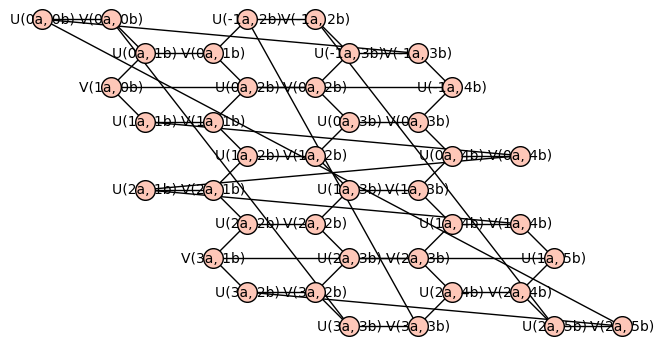

In [3]:
G = nanotorus(4,2,-2,4)
print(G.is_vertex_transitive(), G.order(), G.size(), G.degree().count(3) == len(G.degree()), G.diameter())
#(tranzitivnost, št. vozlišč, št. povezav, vse točke reda 3, premer)
G.plot() 

(True, 480, 720, True, 36)


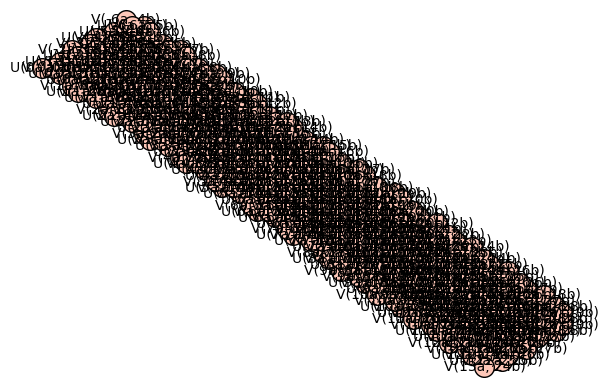

In [3]:
G = nanotorus(-7,5,13,25)
print(G.is_vertex_transitive(), G.order(), G.size(), G.degree().count(3) == len(G.degree()), G.diameter())
#(tranzitivnost, št. vozlišč, št. povezav, vse točke reda 3, premer)
G.plot() 

(True, 1310, 1965, True, 35)


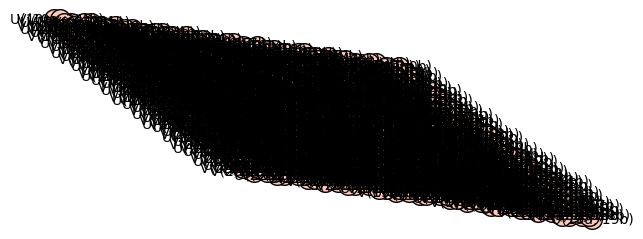

In [4]:
G = nanotorus(10,-35,13,20)
print(G.is_vertex_transitive(), G.order(), G.size(), G.degree().count(3) == len(G.degree()), G.diameter())
#(tranzitivnost, št. vozlišč, št. povezav, vse točke reda 3, premer)
G.plot() 

(True, 40, 60, True, 10)


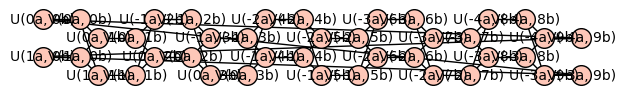

In [5]:
G = nanotorus(2,0,-5,10)
print(G.is_vertex_transitive(), G.order(), G.size(), G.degree().count(3) == len(G.degree()), G.diameter())
#(tranzitivnost, št. vozlišč, št. povezav, vse točke reda 3, premer)
G.plot() 

In [17]:
G.vertices()

[V(-2a, 5b),
 V(0a, 1b),
 V(-2a, 4b),
 V(-2a, 6b),
 V(-1a, 4b),
 V(0a, 0b),
 V(1a, 0b),
 V(0a, 2b),
 V(1a, 1b),
 V(-4a, 9b),
 V(0a, 3b),
 V(-3a, 9b),
 V(-3a, 8b),
 V(-4a, 8b),
 V(-2a, 7b),
 V(-3a, 7b),
 U(-2a, 6b),
 U(-2a, 5b),
 U(1a, 0b),
 U(-3a, 6b),
 U(-2a, 4b),
 U(-1a, 5b),
 U(-1a, 4b),
 U(-1a, 3b),
 U(1a, 1b),
 V(-1a, 2b),
 U(-4a, 8b),
 U(-4a, 9b),
 U(-3a, 8b),
 U(-3a, 9b),
 V(-1a, 5b),
 U(-3a, 7b),
 U(-2a, 7b),
 V(-3a, 6b),
 V(-1a, 3b),
 U(-1a, 2b),
 U(0a, 0b),
 U(0a, 1b),
 U(0a, 2b),
 U(0a, 3b)]

In [14]:
s = []
s.append(3)
s

[3]

In [18]:
del(s[0])
s

[]

In [21]:
pvs(G)

KeyError: V(-3a, 5b)

In [25]:
G = nanotorus(2,0,-5,10)
i = []

def izomorfna(F, G):
    try:
        return F.is_isomorphic(G)
    except AttributeError:
        return False

for k in range(-10, 10):
    for l in range(-10, 10):
        for m in range(-10, 10):
            for n in range(-10, 10):
                if izomorfna(nanotorus(k,l,m,n),G):
                    i.append('{},{},{},{}'.format(k,l,m,n))

i

Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!


Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!


Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!


Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!


Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!


Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!


Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!


Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!


Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!


Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!


Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!
Paralelogram je izrojen!


['-10,-10,0,2',
 '-10,-10,2,0',
 '-10,-9,0,-2',
 '-10,-9,0,2',
 '-10,-8,0,-2',
 '-10,-8,0,2',
 '-10,-7,0,-2',
 '-10,-7,0,2',
 '-10,-6,0,-2',
 '-10,-6,0,2',
 '-10,-5,0,-2',
 '-10,-5,0,2',
 '-10,-4,0,-2',
 '-10,-4,0,2',
 '-10,-3,0,-2',
 '-10,-3,0,2',
 '-10,-2,0,-2',
 '-10,-2,0,2',
 '-10,-1,-10,1',
 '-10,-1,0,-2',
 '-10,-1,0,2',
 '-10,0,-2,2',
 '-10,0,0,-2',
 '-10,0,0,2',
 '-10,0,2,-2',
 '-10,1,-10,-1',
 '-10,1,0,-2',
 '-10,1,0,2',
 '-10,2,0,-2',
 '-10,2,0,2',
 '-10,3,0,-2',
 '-10,3,0,2',
 '-10,4,-10,6',
 '-10,4,0,-2',
 '-10,4,0,2',
 '-10,5,0,-2',
 '-10,5,0,2',
 '-10,6,-10,4',
 '-10,6,0,-2',
 '-10,6,0,2',
 '-10,7,0,-2',
 '-10,7,0,2',
 '-10,8,0,-2',
 '-10,8,0,2',
 '-10,9,0,-2',
 '-10,9,0,2',
 '-9,-10,-2,0',
 '-9,-10,2,0',
 '-9,-1,-2,2',
 '-9,-1,2,-2',
 '-8,-10,-2,0',
 '-8,-10,2,0',
 '-8,-2,-2,2',
 '-8,-2,2,-2',
 '-7,-10,-2,0',
 '-7,-10,2,0',
 '-7,-3,-2,2',
 '-7,-3,2,-2',
 '-6,-10,-2,0',
 '-6,-10,2,0',
 '-6,-4,-4,-6',
 '-6,-4,-2,2',
 '-6,-4,2,-2',
 '-6,-4,4,6',
 '-5,-10,-2,0',
 '-5,-10,2,0'

In [26]:
nanotorus(-10,10,0,2).is_isomorphic(G)

True

In [ ]:
# (k, l, m, n) izomorfen (k', 0, m', n')?
H = nanotorus(1, 2, 3, 4)
for k in range(1, 8):
    for m in range(1, 8):
        for n in range(1, 8):
            G = nanotorus(k, 0, m, n)
            if(H.is_isomorphic(G)):
                print (k,0,m,n)

(1, 0, 5, 2)
(1, 0, 7, 2)
(2, 0, 4, 1)
(3, 0, 7, 1)
